In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from matplotlib.ticker import MultipleLocator
from matplotlib import rcParams
train_df = pd.read_csv('150_training.csv', encoding='cp949', index_col='compound')
test_df = pd.read_csv('15_test.csv', encoding='cp949', index_col='compound')

y_tr = train_df.pop('target')
x_tr = train_df

y_ts = test_df.pop('Target')
x_ts = test_df

repeated = []

for c in x_tr.columns:
    if len(np.unique(x_tr[c])) == 1:
        repeated.append(c)
        x_tr = x_tr.drop([c], axis=1)
for c in repeated:
    x_ts = x_ts.drop([c], axis=1)

scaler = MinMaxScaler()
x_tr_sc = scaler.fit_transform(x_tr)
x_ts_sc = scaler.transform(x_ts)
x_tr = pd.DataFrame(x_tr_sc, columns=x_tr.columns, index=x_tr.index)
x_ts = pd.DataFrame(x_ts_sc, columns=x_ts.columns, index=x_ts.index)


In [5]:

def get_plot(pred_tr, pred_ts, name):
    rcParams['axes.linewidth'] = 1.5
    rcParams['xtick.major.width'] = 1.5
    rcParams['ytick.major.width'] = 1.5
    rcParams['xtick.minor.width'] = 1.5
    rcParams['ytick.minor.width'] = 1.5
    rcParams['xtick.major.size'] = 6
    rcParams['ytick.major.size'] = 6
    rcParams['xtick.minor.size'] = 3
    rcParams['ytick.minor.size'] = 3
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot()
    a = np.linspace(-3, 3, 100)
    ax.plot(a, a, color='k', label='$y = x$')
    ax.scatter(y_tr, pred_tr, edgecolor='k', facecolor='grey', alpha=0.8, label='Train data')
    ax.scatter(y_ts, pred_ts, edgecolor='k', facecolor='red', alpha=0.8, label='Test data')
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.xaxis.set_major_formatter('{x:.1f}')
    ax.yaxis.set_minor_locator(MultipleLocator(0.5))
    ax.yaxis.set_major_formatter('{x:.1f}')
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontweight('bold')
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontweight('bold')
    ax.patch.set_facecolor('#F5FAF5')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.title(name)
    plt.plot()

### Ridge

Training result
R2 : 0.8346 | RMSE : 0.3009
Test result
R2 : 0.5353 | RMSE : 0.3197


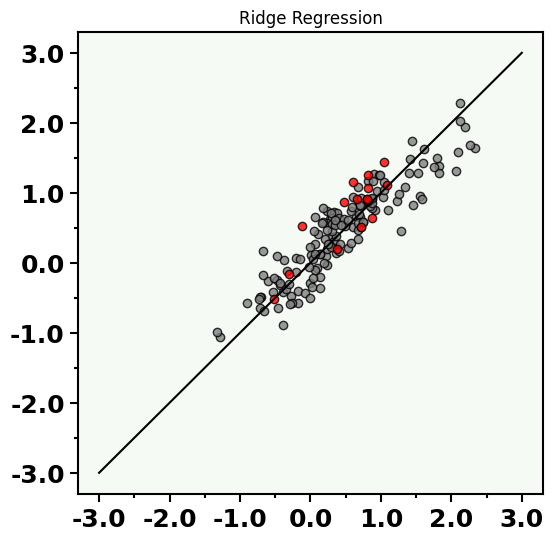

In [6]:
model =Ridge(alpha=0.0204081).fit(x_tr, y_tr)
pred_tr = model.predict(x_tr)
pred_ts = model.predict(x_ts)
train_r2 = r2_score(y_tr, pred_tr)
test_r2 = r2_score(y_ts, pred_ts)

train_rmse = mean_squared_error(y_tr, pred_tr)**0.5
test_rmse = mean_squared_error(y_ts, pred_ts)**0.5
model = Ridge(alpha=0.0204081).fit(x_tr, y_tr)
pred_tr = model.predict(x_tr)
pred_ts = model.predict(x_ts)

train_r2, test_r2 = r2_score(y_tr, pred_tr), r2_score(y_ts, pred_ts)

print(f'Training result')
print(f'R2 : {train_r2:.4f} | RMSE : {train_rmse:.4f}')
print(f'Test result')
print(f'R2 : {test_r2:.4f} | RMSE : {test_rmse:.4f}')

get_plot(pred_tr, pred_ts, 'Ridge Regression')

### LASSO

Training result
R2 : 0.5867 | RMSE : 0.4758
Test result
R2 : 0.5887 | RMSE : 0.3008


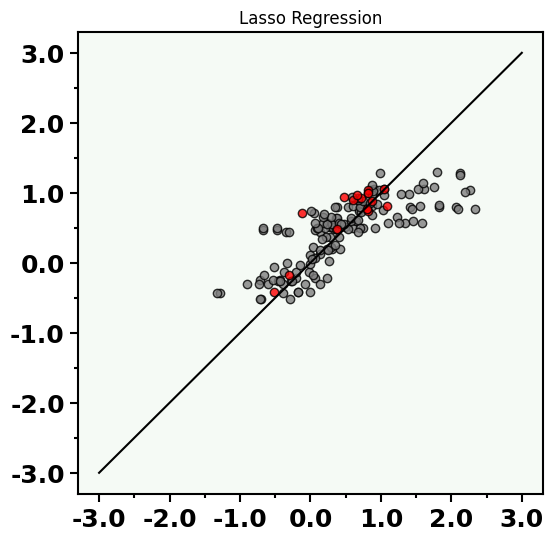

In [7]:
model =Lasso(alpha=0.021387).fit(x_tr, y_tr)
pred_tr = model.predict(x_tr)
pred_ts = model.predict(x_ts)
train_r2 = r2_score(y_tr, pred_tr)
test_r2 = r2_score(y_ts, pred_ts)
train_rmse = mean_squared_error(y_tr, pred_tr)**0.5
test_rmse = mean_squared_error(y_ts, pred_ts)**0.5
print(f'Training result')
print(f'R2 : {train_r2:.4f} | RMSE : {train_rmse:.4f}')
print(f'Test result')
print(f'R2 : {test_r2:.4f} | RMSE : {test_rmse:.4f}')

get_plot(pred_tr, pred_ts, 'Lasso Regression')

### Elastic

Training result
R2 : 0.5436 | RMSE : 0.4999
Test result
R2 : 0.5893 | RMSE : 0.3006


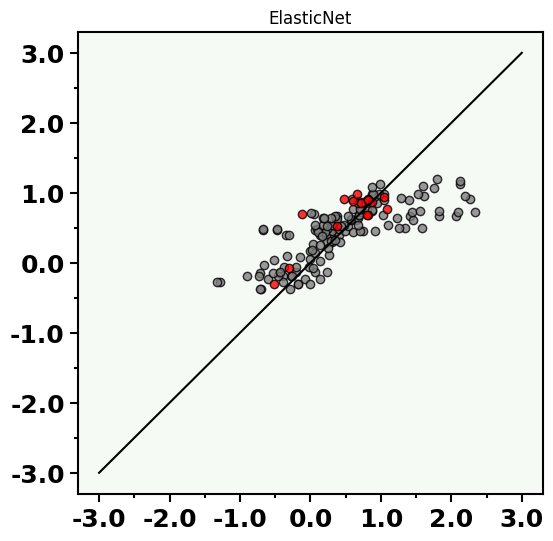

In [8]:
model = ElasticNet(alpha=0.051969).fit(x_tr, y_tr)
pred_tr = model.predict(x_tr)
pred_ts = model.predict(x_ts)
train_r2 = r2_score(y_tr, pred_tr)
test_r2 = r2_score(y_ts, pred_ts)
train_rmse = mean_squared_error(y_tr, pred_tr)**0.5
test_rmse = mean_squared_error(y_ts, pred_ts)**0.5
print(f'Training result')
print(f'R2 : {train_r2:.4f} | RMSE : {train_rmse:.4f}')
print(f'Test result')
print(f'R2 : {test_r2:.4f} | RMSE : {test_rmse:.4f}')

get_plot(pred_tr, pred_ts, 'ElasticNet')

### KNN

Training result
R2 : 0.5845 | RMSE : 0.4770
Test result
R2 : 0.6029 | RMSE : 0.2956


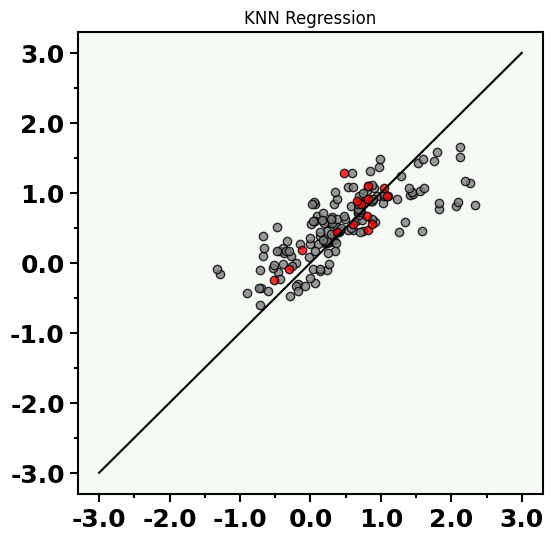

In [9]:
model = KNeighborsRegressor(n_neighbors=6, weights='uniform').fit(x_tr, y_tr)
pred_tr = model.predict(x_tr)
pred_ts = model.predict(x_ts)
train_r2 = r2_score(y_tr, pred_tr)
test_r2 = r2_score(y_ts, pred_ts)

train_rmse = mean_squared_error(y_tr, pred_tr)**0.5
test_rmse = mean_squared_error(y_ts, pred_ts)**0.5

print(f'Training result')
print(f'R2 : {train_r2:.4f} | RMSE : {train_rmse:.4f}')
print(f'Test result')
print(f'R2 : {test_r2:.4f} | RMSE : {test_rmse:.4f}')

get_plot(pred_tr, pred_ts, 'KNN Regression')

### SVR

Training result
R2 : 0.8736 | RMSE : 0.2631
Test result
R2 : 0.5439 | RMSE : 0.3168


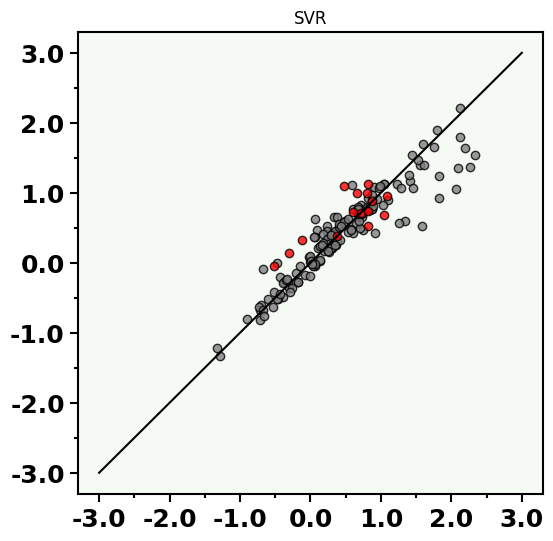

In [10]:
model = SVR(kernel='poly', C=1, degree=3,).fit(x_tr, y_tr)
pred_tr = model.predict(x_tr)
pred_ts = model.predict(x_ts)
train_r2 = r2_score(y_tr, pred_tr)
test_r2 = r2_score(y_ts, pred_ts)
train_rmse = mean_squared_error(y_tr, pred_tr)**0.5
test_rmse = mean_squared_error(y_ts, pred_ts)**0.5
print(f'Training result')
print(f'R2 : {train_r2:.4f} | RMSE : {train_rmse:.4f}')
print(f'Test result')
print(f'R2 : {test_r2:.4f} | RMSE : {test_rmse:.4f}')

get_plot(pred_tr, pred_ts, 'SVR')

### MLP

Training result
R2 : 0.8284 | RMSE : 0.3065
Test result
R2 : 0.7490 | RMSE : 0.2350


/home/dslab1/anaconda3/envs/env1/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/home/dslab1/anaconda3/envs/env1/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


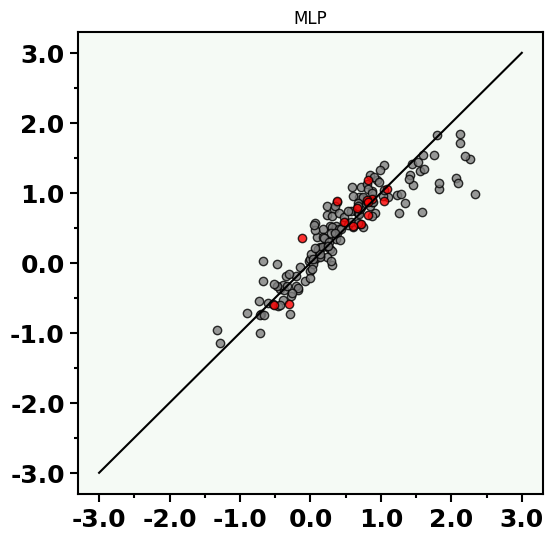

In [11]:
X_tr = np.array(x_tr.values)
X_ts = np.array(x_ts.values)
model = MLPRegressor(hidden_layer_sizes=(64, 64), alpha=0.05, learning_rate_init=0.0001, learning_rate='adaptive',
max_iter=1500, shuffle=True, random_state=0, early_stopping=True, n_iter_no_change=10).fit(X_tr, y_tr)
pred_tr = model.predict(x_tr)
pred_ts = model.predict(x_ts)
train_r2 = r2_score(y_tr, pred_tr)
test_r2 = r2_score(y_ts, pred_ts)

train_rmse = mean_squared_error(y_tr, pred_tr)**0.5
test_rmse = mean_squared_error(y_ts, pred_ts)**0.5

print(f'Training result')
print(f'R2 : {train_r2:.4f} | RMSE : {train_rmse:.4f}')
print(f'Test result')
print(f'R2 : {test_r2:.4f} | RMSE : {test_rmse:.4f}')

get_plot(pred_tr, pred_ts, 'MLP')

In [12]:
train_df = pd.read_csv('150_training.csv', encoding='cp949', index_col='compound')
test_df = pd.read_csv('15_test.csv', encoding='cp949', index_col='compound')
scaler = StandardScaler()
x_tr = scaler.fit_transform(x_tr)
x_ts = scaler.transform(x_ts)

[LightGBM] [Warning] Unknown parameter: num_leave
[LightGBM] [Warning] min_data_in_leaf is set=9, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=9
Training result
R2 : 0.9433 | RMSE : 0.1762
Test result
R2 : 0.9006 | RMSE : 0.1479


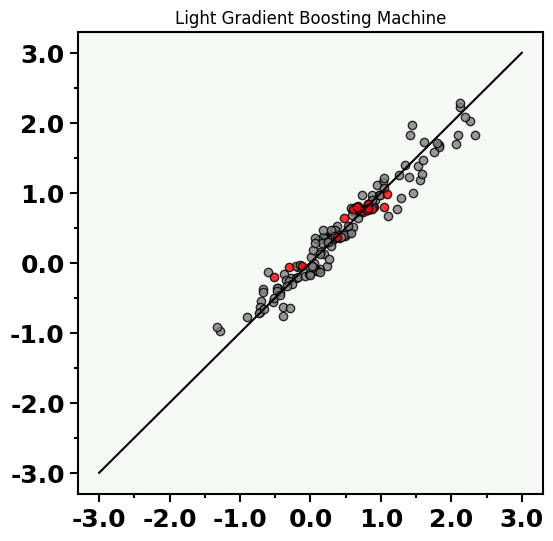

In [13]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
model= LGBMRegressor(max_depth=2,num_leave=10,min_data_in_leaf = 9)
model.fit(x_tr,y_tr)
pred_tr = model.predict(x_tr)
pred_ts = model.predict(x_ts)
train_r2 = r2_score(y_tr, pred_tr)
test_r2 = r2_score(y_ts, pred_ts)
train_rmse = mean_squared_error(y_tr, pred_tr)**0.5
test_rmse = mean_squared_error(y_ts, pred_ts)**0.5

print(f'Training result')
print(f'R2 : {train_r2:.4f} | RMSE : {train_rmse:.4f}')
print(f'Test result')
print(f'R2 : {test_r2:.4f} | RMSE : {test_rmse:.4f}')


get_plot(pred_tr,pred_ts,'Light Gradient Boosting Machine')

0:	learn: 0.7142571	total: 46.1ms	remaining: 2.72s
1:	learn: 0.6775604	total: 46.6ms	remaining: 1.35s
2:	learn: 0.6494228	total: 46.8ms	remaining: 888ms
3:	learn: 0.6241502	total: 47ms	remaining: 658ms
4:	learn: 0.5974722	total: 47.2ms	remaining: 519ms
5:	learn: 0.5695735	total: 47.4ms	remaining: 427ms
6:	learn: 0.5452690	total: 47.6ms	remaining: 360ms
7:	learn: 0.5244048	total: 47.8ms	remaining: 311ms
8:	learn: 0.5088054	total: 48ms	remaining: 272ms
9:	learn: 0.4938633	total: 48.3ms	remaining: 241ms
10:	learn: 0.4754696	total: 48.6ms	remaining: 216ms
11:	learn: 0.4644282	total: 48.8ms	remaining: 195ms
12:	learn: 0.4536746	total: 49ms	remaining: 177ms
13:	learn: 0.4435174	total: 49.1ms	remaining: 161ms
14:	learn: 0.4327831	total: 49.3ms	remaining: 148ms
15:	learn: 0.4172631	total: 49.5ms	remaining: 136ms
16:	learn: 0.4035223	total: 49.7ms	remaining: 126ms
17:	learn: 0.3970482	total: 50ms	remaining: 117ms
18:	learn: 0.3909676	total: 50.2ms	remaining: 108ms
19:	learn: 0.3810726	total: 50

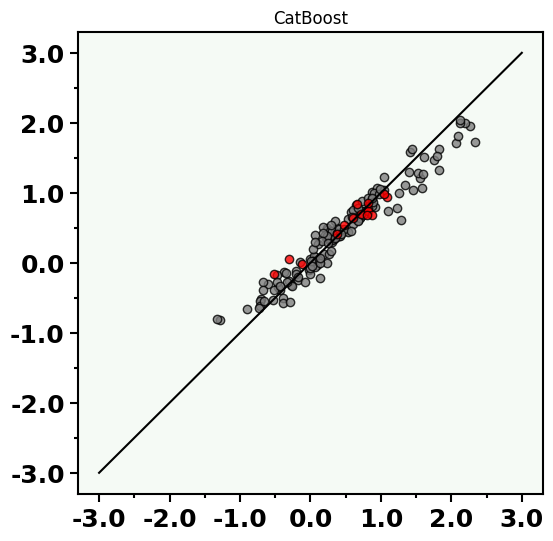

In [14]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(n_estimators=60,max_depth=3,learning_rate=0.09,min_child_samples=5,grow_policy='SymmetricTree')
model.fit(x_tr,y_tr)
pred_tr = model.predict(x_tr)
pred_ts = model.predict(x_ts)
train_r2 = r2_score(y_tr, pred_tr)
test_r2 = r2_score(y_ts, pred_ts)
train_rmse = mean_squared_error(y_tr, pred_tr)**0.5
test_rmse = mean_squared_error(y_ts, pred_ts)**0.5

print(f'Training result')
print(f'R2 : {train_r2:.4f} | RMSE : {train_rmse:.4f}')
print(f'Test result')
print(f'R2 : {test_r2:.4f} | RMSE : {test_rmse:.4f}')
get_plot(pred_tr,pred_ts,'CatBoost')

Training result
R2 : 0.9046 | RMSE : 0.2286
Test result
R2 : 0.7755 | RMSE : 0.2222


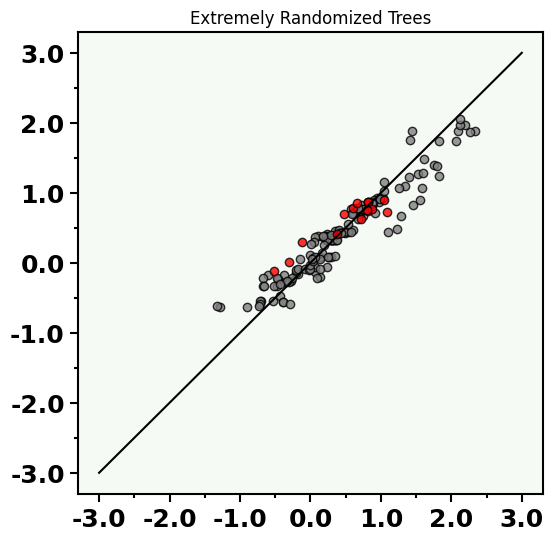

In [15]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(random_state=92,max_depth = 5,min_samples_leaf=4,max_features='auto',
warm_start=True,n_estimators=75,criterion='absolute_error',min_impurity_decrease=0.005)
model.fit(x_tr,y_tr)
pred_tr = model.predict(x_tr)
pred_ts = model.predict(x_ts)
train_r2 = r2_score(y_tr, pred_tr)
test_r2 = r2_score(y_ts, pred_ts)
train_rmse = mean_squared_error(y_tr, pred_tr)**0.5
test_rmse = mean_squared_error(y_ts, pred_ts)**0.5

print(f'Training result')
print(f'R2 : {train_r2:.4f} | RMSE : {train_rmse:.4f}')
print(f'Test result')
print(f'R2 : {test_r2:.4f} | RMSE : {test_rmse:.4f}')
get_plot(pred_tr,pred_ts,'Extremely Randomized Trees')

Training result
R2 : 0.2596 | RMSE : 0.6368
Test result
R2 : 0.4978 | RMSE : 0.3324


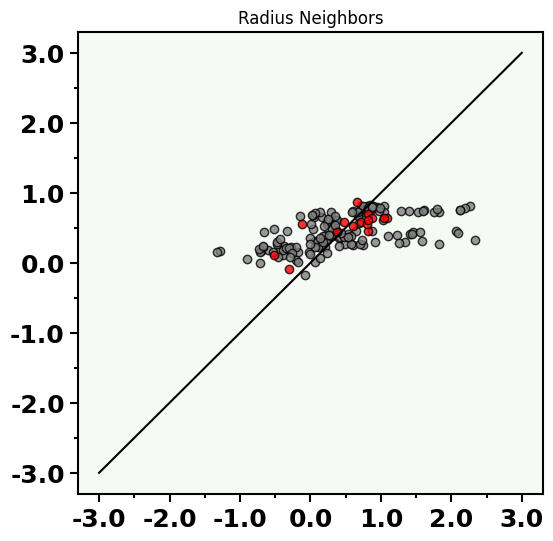

In [16]:
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.decomposition import PCA
model = RadiusNeighborsRegressor(radius=0.9,weights='uniform',algorithm = 'auto',metric='cosine')
model.fit(x_tr, y_tr)
pred_tr = model.predict(x_tr)
pred_ts = model.predict(x_ts)
train_r2 = r2_score(y_tr, pred_tr)
test_r2 = r2_score(y_ts, pred_ts)

train_rmse = mean_squared_error(y_tr, pred_tr)**0.5
test_rmse = mean_squared_error(y_ts, pred_ts)**0.5
print(f'Training result')
print(f'R2 : {train_r2:.4f} | RMSE : {train_rmse:.4f}')
print(f'Test result')
print(f'R2 : {test_r2:.4f} | RMSE : {test_rmse:.4f}')
get_plot(pred_tr,pred_ts,'Radius Neighbors')

Training result
R2 : 0.9540 | RMSE : 0.1588
Test result
R2 : 0.8802 | RMSE : 0.1623


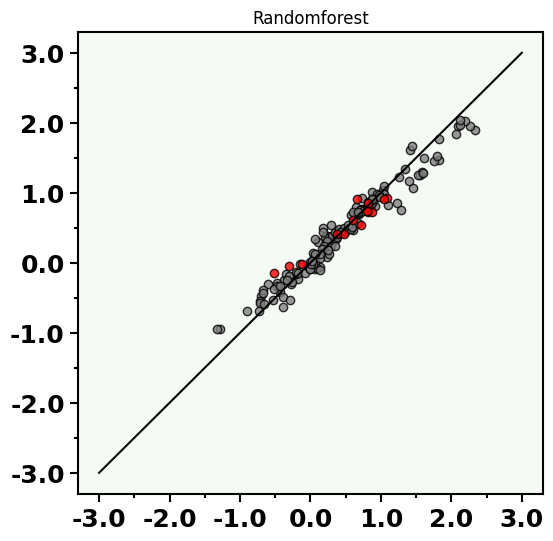

In [17]:
rf = RandomForestRegressor(max_depth=7, max_features='sqrt',
                            min_samples_leaf=1, min_samples_split=5, n_estimators=80, 
                            random_state=39, n_jobs=-1).fit(x_tr, y_tr)
pred_tr = rf.predict(x_tr)
pred_ts = rf.predict(x_ts)

train_r2 = r2_score(y_tr, pred_tr)
test_r2 = r2_score(y_ts, pred_ts)
train_rmse = mean_squared_error(y_tr, pred_tr)**0.5
test_rmse = mean_squared_error(y_ts, pred_ts)**0.5
print(f'Training result')
print(f'R2 : {train_r2:.4f} | RMSE : {train_rmse:.4f}')
print(f'Test result')
print(f'R2 : {test_r2:.4f} | RMSE : {test_rmse:.4f}')
get_plot(pred_tr,pred_ts,'Randomforest')

Training result
R2 : 0.9827 | RMSE : 0.0972
Test result
R2 : 0.9154 | RMSE : 0.1365


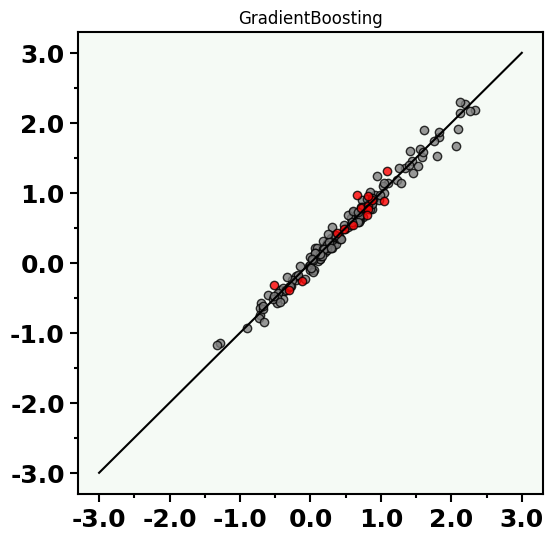

In [18]:
gb = GradientBoostingRegressor(n_estimators=150, learning_rate=0.17,
                                max_depth=4, subsample=0.2, 
                                min_samples_split=4, max_features='sqrt', random_state=102).fit(x_tr, y_tr)
pred_tr = gb.predict(x_tr)
pred_ts = gb.predict(x_ts)

train_r2 = r2_score(y_tr, pred_tr)
test_r2 = r2_score(y_ts, pred_ts)
train_rmse = mean_squared_error(y_tr, pred_tr)**0.5
test_rmse = mean_squared_error(y_ts, pred_ts)**0.5
print(f'Training result')
print(f'R2 : {train_r2:.4f} | RMSE : {train_rmse:.4f}')
print(f'Test result')
print(f'R2 : {test_r2:.4f} | RMSE : {test_rmse:.4f}')
get_plot(pred_tr,pred_ts,'GradientBoosting')